# Metodos de Monte Carlo en Física 
#### Realizado por: Santiago Morales

Resumen: En este notebook se presentan los resultados obtenidos durante el desarrollo de un trabajo presentado como proyecto final en el curso de física computacional 2 de la carrera de física en la Universidad de Antioquia. Todos los calculos fueron hechos en programas de c++.
Se desarrollaron tres problemas principales, el modelo de Ising 1D, el modelo de Ising 2D y el calculo de la función de onda para una partícula cuántica por medio de integrales de camino.

Palabras clave: Modelo de Ising, Calor especifico, Temperatura de Curie, Metodos de Monte Carlo, Integrales de camino.

## Modelo de Ising 1D

El modelo de Ising intenta describir el comportamiento de una cadena de espines, como la que se observa en la siguiente imagen: 

![title](Imagenes/Ising1D.png)

En donde dos espines consecutivos en la misma dirección, se dice que están paralelos y si están en dirección contraria se dice que están antiparalelos.
Para este modelo, se tiene en cuenta solo la interacción entre primeros vecinos, a partir del siguiente hamiltoniano:

$$\mathcal{H} = -\sum\limits_{<i,j>} J\sigma_i\sigma_j$$

Donde J es la energía de intercambio y es una medida de la intensidad de la interacción spin-spin, si $J>0$ la interacción es ferromagnética, y si $J<0$ la interacción es antiferromagnética.

A pesar de ser un modelo aparentemente sencillo, las posibles configuraciones del sistema son muy grandes incluso para un numero pequeño de espines. Un sistema de N espines tiene $2^N$ configuraciones posibles. De allí que las aproximaciones computacionales, especificamente mediante metodos de Montecarlo, son muy deseables para solucionar este tipo de problemas.

### Condiciones de frontera
Para evitar problemas en las fronteras se asumen condiciones de frontera ciclicas, es decir la cadena sería como un circulo en donde despues del "ultimo" elemento no termina la cadena sino que sigue de nuevo el primero. De esta forma se evita que los extremos sean puntos especiales, y el comportamiento sea homogeneo.

### Algoritmo de Metropolis

Segun la distribución de Boltzmann no se requiere que el sistema se mantenga siempre en el estado de menor energía, sino que la probabilidad de encontrar una configuración con energía alta es menor que encontrar una con una energía menor. La fluctuación de las configuraciones está dada por la temperatura de tal forma que si  $T\rightarrow0$ no se presentaran fluctuaciones y el sistema sí se mantendrá en el estado de menor energía.

Metropolis, Rosenbluth, Teller y Teller (Metropolis et al, 1953) inventaron un algoritmo de Monte Carlo en donde se tienen en cuenta estas condiciones propias de la distribución de Boltzmann, de tal forma que simula apropiadamente las fluctuaciones durante el equilibrio térmico.

#### Pasos:
1. Comenzar con una configuración arbitraria de espines $\alpha_k =$ {$s_1,s_2,...s_N$}, y calcular su energía (($E_{\alpha_{k}}$))
2. Generar un $\alpha_{tr}$ al escoger una posición (aleatoriamente) i de la configuración e invertir el espin de ésta.
3. Calcular la energia de de la configuración de prueba ($E_{\alpha_{tr}}$)
4. Si $E_{\alpha_{tr}}\leq E_{\alpha_{k}}$ entonces se acepta la prueba $\alpha_{k+1}$ = $\alpha_{tr}$
5. Si $E_{\alpha_{tr}} > E_{\alpha_{k}}$ se acepta la configuración de prueba con una probabilidad $\mathcal{R} = exp(-\Delta E/K_BT)$ 

A partir de la repetición de este algoritmo un numero considerable de veces, es posible simular el equilibrio térmico del sistema. Y una vez en el equilibrio térmico es posible calcular las propiedades termodinámicas del sistema (energía interna, magnetización y calor especifico).

In [2]:
import numpy as np
import matplotlib.pylab as plt

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Ver/No ver código"></form>''')



## Resultados obtenidos en el modelo de Ising 1D

### Evolución del sistema durante mil pasos de tiempo

A continuación se presenta la evolución del modelo para una cadena de 150 espines con diferentes condiciones (tanto del material como del ambiente).

La cadena está representada en el eje vertical mientras que el tiempo avanza en el eje horizontal.

#### Bajas temperaturas (T=1)

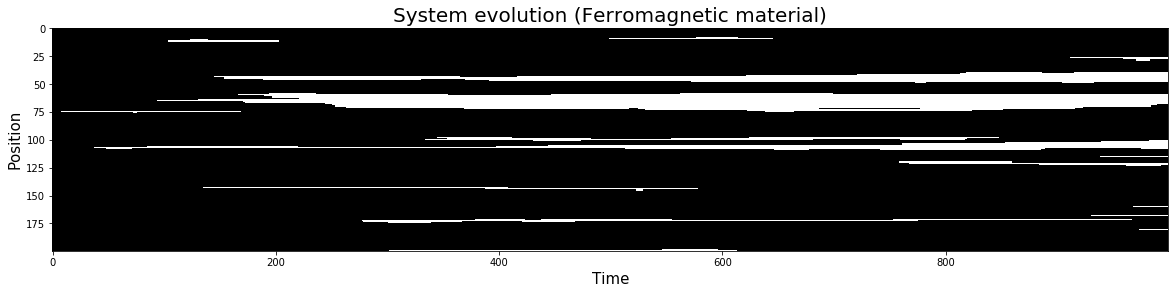

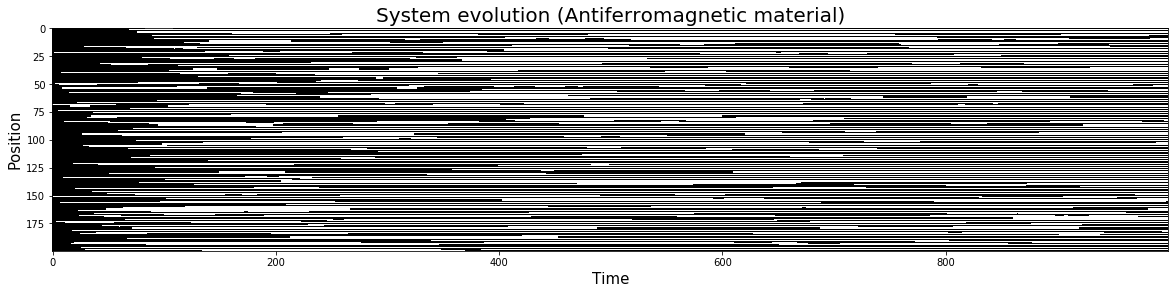

In [8]:
Ising1Devolution = np.loadtxt("data/spins1DFerroBT.dat")
plt.figure(figsize=(20,50))
plt.title("System evolution (Ferromagnetic material)",fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Position",fontsize=15)
plt.imshow(Ising1Devolution.T,cmap="binary")
plt.show()

Ising1Devolution = np.loadtxt("data/spins1DAntiFerroBT.dat")
plt.figure(figsize=(20,50))
plt.title("System evolution (Antiferromagnetic material)",fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Position",fontsize=15)
plt.imshow(Ising1Devolution.T,cmap="binary")
plt.show()

#### Altas temperaturas (T=10)

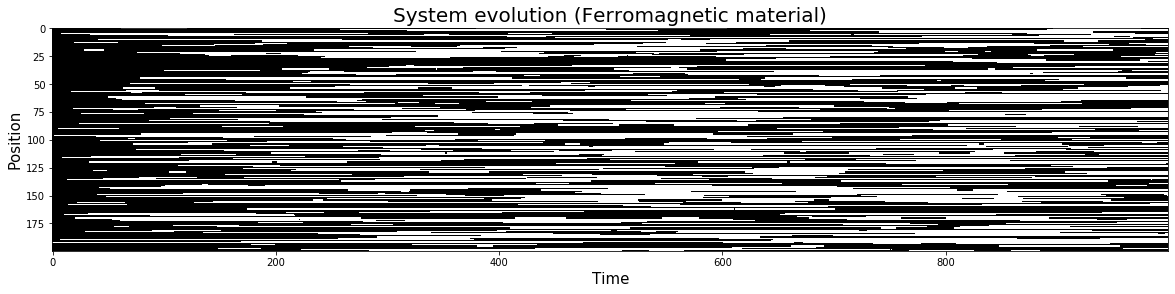

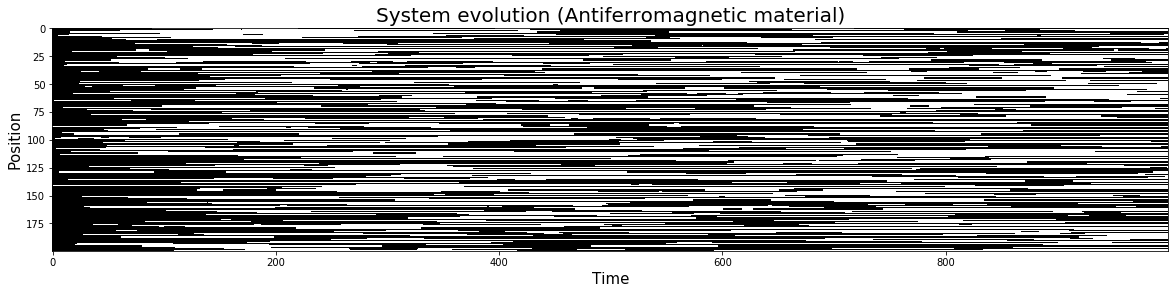

In [9]:
Ising1Devolution = np.loadtxt("data/spins1DFerroAT.dat")
plt.figure(figsize=(20,50))
plt.title("System evolution (Ferromagnetic material)",fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Position",fontsize=15)
plt.imshow(Ising1Devolution.T,cmap="binary")
plt.show()

Ising1Devolution = np.loadtxt("data/spins1DAntiFerroAT.dat")
plt.figure(figsize=(20,50))
plt.title("System evolution (Antiferromagnetic material)",fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Position",fontsize=15)
plt.imshow(Ising1Devolution.T,cmap="binary")
plt.show()

A partir de las 4 imagenes anteriores es posible concluir que para temperaturas bajas el comportamiento del sistema está dado, casi en su totalidad, por las caracteristicas del material. Para el material ferromagnético los espines se organizan de tal forma que en su mayoría tengan vecinos paralelos, mientras que para el material antiferromagnético los espines se organizan de tal forma que sus vecinos sean antiparalelos. Por otro lado, para temperaturas altas, el comportamiento del sistema es altamente dependiente del ambiente, y, contrario a lo que ocurre a bajas temperaturas, las caracteristicas del material no influyen significativamente en la organización de los espines, por lo que se podría decir que se pierden las propiedades ferromagnéticas (o antiferromagnéticas) del material y el comportamiento es el de un material paramagnético.

### Propiedades termodinámicas (sistema en equilibrio)

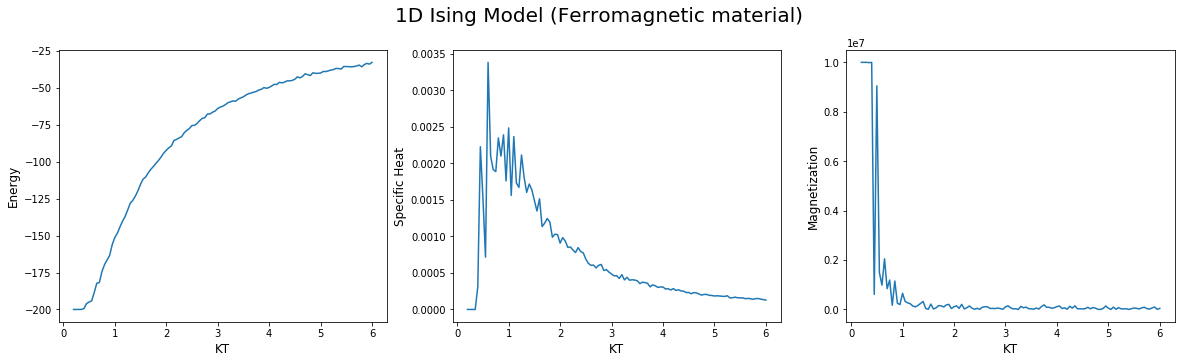

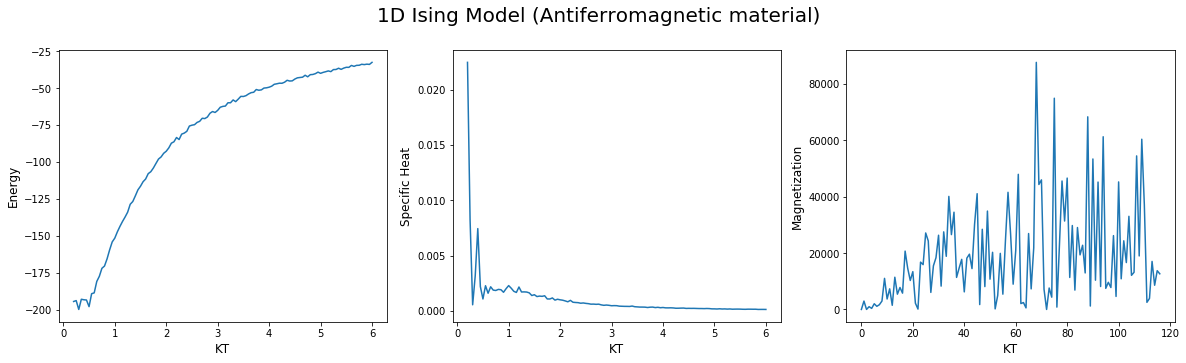

In [11]:
dataFerro = np.loadtxt("dataFerro.dat")
Energy = dataFerro[:,0]
Magnetizations = dataFerro[:,1]
SpecificHeat = dataFerro[:,2]
X = np.linspace(0.2,6,len(Energy))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 5))
fig.suptitle('1D Ising Model (Ferromagnetic material)',fontsize=20,y=1)

ax1.set_ylabel("Energy",fontsize=12)
ax1.set_xlabel("KT",fontsize=12)
ax1.plot(X,Energy)

ax2.set_ylabel("Specific Heat",fontsize=12)
ax2.set_xlabel("KT",fontsize=12)
ax2.plot(X[-len(SpecificHeat):],SpecificHeat)

ax3.set_ylabel("Magnetization",fontsize=12)
ax3.set_xlabel("KT",fontsize=12)
ax3.plot(X,np.abs(Magnetizations))
plt.show()

dataAntiFerro = np.loadtxt("dataAntiFerro.dat")
Energy = dataAntiFerro[:,0]
Magnetizations = dataAntiFerro[:,1]
SpecificHeat = dataAntiFerro[:,2]
X = np.linspace(0.2,6,len(Energy))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 5))
fig.suptitle('1D Ising Model (Antiferromagnetic material)',fontsize=20,y=1)

ax1.set_ylabel("Energy",fontsize=12)
ax1.set_xlabel("KT",fontsize=12)
ax1.plot(X,Energy)

ax2.set_ylabel("Specific Heat",fontsize=12)
ax2.set_xlabel("KT",fontsize=12)
ax2.plot(X[-len(SpecificHeat):],SpecificHeat)

ax3.set_ylabel("Magnetization",fontsize=12)
ax3.set_xlabel("KT",fontsize=12)
ax3.plot(np.abs(Magnetizations))
plt.show()

En las graficas anteriores es posible observar que el modelo de Ising 1D describe de forma apropiada (según la teoría) algunas cosas de el comportamiento de las propiedades termodinámicas. Por ejemplo, describe que para temperaturas cercanas a 0 la energía interna del sistema se mantiene en su estado base, y a medida que la temperatura aumenta tambien lo hace la energía interna del sistema. En cuanto al calor especifico, el modelo describe que para temperaturas altas éste se hace 0, pero en este caso no describe corrrectamente el comportamiento para temperaturas pequeñas, en donde se observa un comportamiento bastante aleatorio en el caso de los materiales atiferromagnéticos, y para el caso de los ferromagnéticos, a pesar de que predice un pico (tal como se espera teoricamente), éste no ocurre cerca al valor indicado (temperatura de Curie), sino mucho antes. Ademas, para la magnetización en los materiales ferromagnéticos, en general se decribe bien el comportamiento, en el que se pasa de un material completamente magnetizado que, mediante el baño de temperatura, pierde dicha magnetización, por lo que para T grandes ésta se hace aproximadamente 0, pero el cambio se da muy drasticamente y en temperaturas muy bajas, contrario a lo que teoricamente se espera, que es un cambio un poco más suave y en las cercanías de la temperatura de Curie, mientras que para los materiales antiferromagnéticos predice un comportamiento azaroso cercano a 0, tal como es predicho teoricamente. Por ultimo, no es posible observar en las graficas transiciones de fase claramente, por lo que tampoco es posible usar este modelo para encontrar un valor de la temperatura de Curie (temperatura en la que ocurre la transición de fase).

## Modelo de Ising 2D

El modelo de Ising 2D no es más que la extrapolación a dos dimensiones del modelo de Ising 1D. Es decir, se toma una red de $N\times N$ espines, en donde cada espín interactua unicamente con sus 4 vecinos más cercanos, por lo que el hamiltoniano es exactamente igual al del modelo unidimensional. 

En cuanto al algoritmo de Metropolis, el algoritmo no se ve modificado al tener en cuenta una dimension adicional, por lo que el cambio de un espín para encontrar una configuración de prueba es de la siguiente forma: 

![title](Imagenes/Ising2D.png)


Para este tipo de modelos el tiempo de calculo para la energía del sistema es bastante extenso ya que es necesario realizar $2\times N\times N$ multiplicaciones y $2\times N\times (N-1)$ sumas tanto para la configuracion $\alpha_k$ como para $\alpha_{tr}$, por lo que es mejor, a la hora de evolucionar el sistema, calcular unicamente $\Delta E = E_{\alpha_{tr}}-E_{\alpha_k}$. Para ésto vemos que, como solo se modifica un espín, todos los valores en $E_{\alpha_k}$ se mantendrán iguales con excepción de aquellos que se calculan usando el espín que se invierte. De esta forma, podemos observar que si se modifica el espín en la posición (i,j), entonces: $$\Delta E = 2 S_{i,j}(S_{i+1,j}+S_{i-1,j}+S_{i,j+1}+S_{i,j-1})$$
Reduciendo el numero de operaciones de $4\times N\times N$ multiplicaciones y $4\times N\times (N-1)$ sumas a 3 sumas y 2 multiplicaciones.

## Resultados obtenidos en el modelo de Ising 2D
Resultados obtenidos para un sistema de $200\times200$ espines. 

### Evolución del sistema durante 10000 pasos de tiempo

#### Bajas temperaturas (T=1)

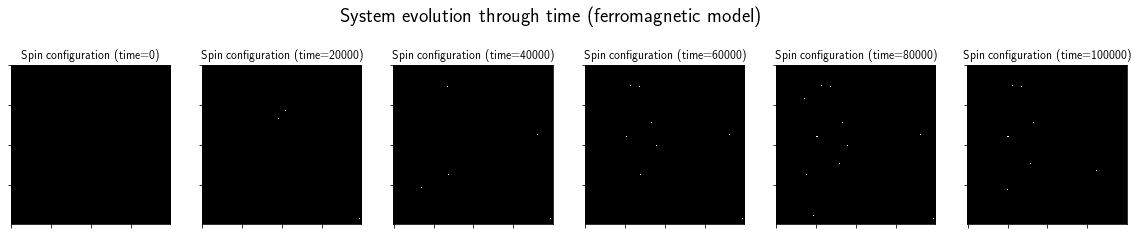

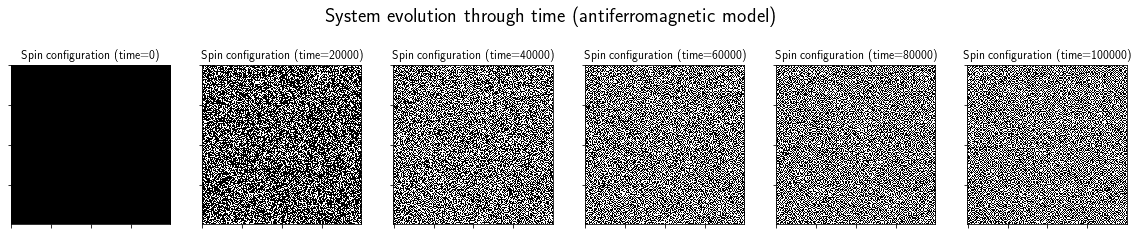

In [343]:
fig, ax = plt.subplots(1, 6,figsize=(20, 4))
cont = 0
fig.suptitle("System evolution through time (ferromagnetic model)",fontsize=20)
for i in np.arange(0,6):
    fileName = "data/spinConfigurationFerroBT"+str(20000*i)+".dat"
    spinConfig = (np.loadtxt(fileName)+1)/2
    spinConfig[0,0]=0
    ax[cont].imshow(spinConfig,cmap="binary")
    ax[cont].set_title("Spin configuration (time=%d)"%(20000*i),fontsize=12)
    ax[cont].set_yticklabels([])
    ax[cont].set_xticklabels([])
    cont+=1
plt.show()

fig, ax = plt.subplots(1, 6,figsize=(20, 4))
cont = 0
fig.suptitle("System evolution through time (antiferromagnetic model)",fontsize=20)
for i in np.arange(0,6):
    fileName = "data/spinConfigurationAntiFerroBT"+str(20000*i)+".dat"
    spinConfig = (np.loadtxt(fileName)+1)/2
    spinConfig[0,0]=0
    ax[cont].imshow(spinConfig,cmap="binary")
    ax[cont].set_title("Spin configuration (time=%d)"%(20000*i),fontsize=12)
    ax[cont].set_yticklabels([])
    ax[cont].set_xticklabels([])
    cont+=1
plt.show()

$$\rightarrow$$
<center>Time evolution

#### Altas temperaturas (T=10)

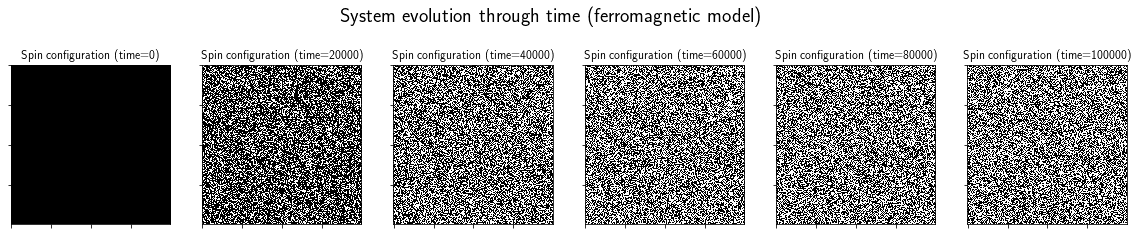

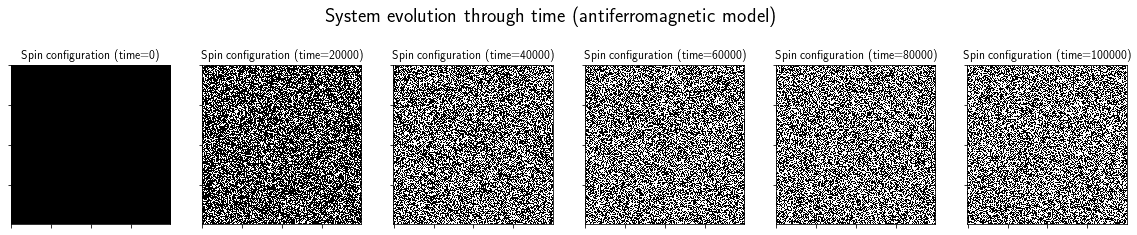

In [344]:
fig, ax = plt.subplots(1, 6,figsize=(20, 4))
cont = 0
fig.suptitle("System evolution through time (ferromagnetic model)",fontsize=20)
for i in np.arange(0,6):
    fileName = "data/spinConfigurationFerroAT"+str(20000*i)+".dat"
    spinConfig = (np.loadtxt(fileName)+1)/2
    spinConfig[0,0]=0
    ax[cont].imshow(spinConfig,cmap="binary")
    ax[cont].set_title("Spin configuration (time=%d)"%(20000*i),fontsize=12)
    ax[cont].set_yticklabels([])
    ax[cont].set_xticklabels([])
    cont+=1
plt.show()

fig, ax = plt.subplots(1, 6,figsize=(20, 4))
cont = 0
fig.suptitle("System evolution through time (antiferromagnetic model)",fontsize=20)
for i in np.arange(0,6):
    fileName = "data/spinConfigurationAntiFerroAT"+str(20000*i)+".dat"
    spinConfig = (np.loadtxt(fileName)+1)/2
    spinConfig[0,0]=0
    ax[cont].imshow(spinConfig,cmap="binary")
    ax[cont].set_title("Spin configuration (time=%d)"%(20000*i),fontsize=12)
    ax[cont].set_yticklabels([])
    ax[cont].set_xticklabels([])
    cont+=1
plt.show()

$$\rightarrow$$
<center>Time evolution

La evolución temporal en el modelo 2D de Ising, ocurre algo similar a lo que ocurre para el modelo 1D, para bajas temperaturas el ordenamiento de los espines está dado por la naturaleza del material (ferromagnético o antiferromagnético) mientras que para altas temperaturas el ordenamiento está mayormente influenciado por la temperatura, y los espines se ordenan azarosamente como en un material paramagnético.

### Propiedades termodinámicas (sistema en equilibrio)
Para el caso ferromagnético se tomó un sistema con $200x200$ espines, mientras que para el caso antiferromagnético se tomó un sistema de $150x150$ espines

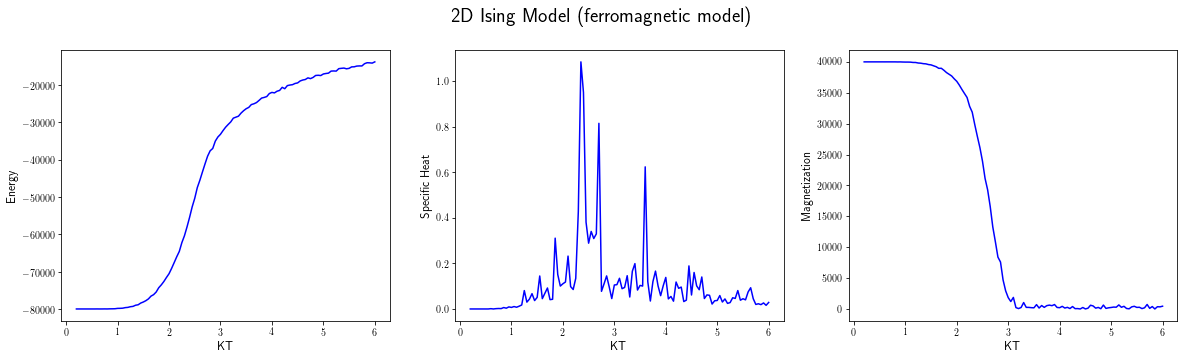

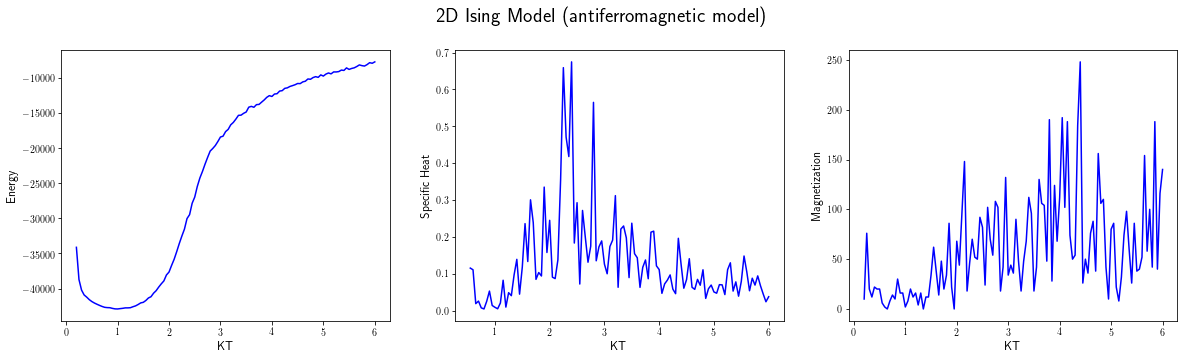

In [379]:
data2D = np.loadtxt("data2D.dat")
Energies2D = data2D[:,0]
Magnetizations2D = data2D[:,1]
SpecificHeat2D = data2D[:,2]
X = np.arange(0.2,6.05,0.05)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 5))
fig.suptitle('2D Ising Model (ferromagnetic model)',fontsize=20,y=1)

ax1.set_ylabel("Energy",fontsize=12)
ax1.set_xlabel("KT",fontsize=12)
ax1.plot(X,Energies2D,color="b")

ax2.set_ylabel("Specific Heat",fontsize=12)
ax2.set_xlabel("KT",fontsize=12)
ax2.plot(X,SpecificHeat2D,color="b")

ax3.set_ylabel("Magnetization",fontsize=12)
ax3.set_xlabel("KT",fontsize=12)
ax3.plot(X,np.abs(Magnetizations2D),color="b")
plt.show()

data2D = np.loadtxt("data2DAntiFerro.dat")
Energies2D = data2D[:,0]
Magnetizations2D = data2D[:,1]
SpecificHeat2D = data2D[:,2]
X = np.arange(0.2,6.05,0.05)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 5))
fig.suptitle('2D Ising Model (antiferromagnetic model)',fontsize=20,y=1)

ax1.set_ylabel("Energy",fontsize=12)
ax1.set_xlabel("KT",fontsize=12)
ax1.plot(X,Energies2D,color="b")

ax2.set_ylabel("Specific Heat",fontsize=12)
ax2.set_xlabel("KT",fontsize=12)
ax2.plot(X[7:],SpecificHeat2D[7:],color="b")

ax3.set_ylabel("Magnetization",fontsize=12)
ax3.set_xlabel("KT",fontsize=12)
ax3.plot(X,np.abs(Magnetizations2D),color="b")
plt.show()

Si bien el comportamiento a largo plazo que se observa en este modelo es similar al observado en el modelo unidimensional, en éste si es posible observar la transición de fase en la temperatura de Curie ($T_c \approx 2.27$) en donde el sistema pasa de poseer una magnetización y comportarse como un material ferromagnético (o antiferromagnético) a comportarse como un material paramagnético sin preferencia alguna por alguna configuración de los espines. Además, es posible observar en el calor especifico el comportamiento esperado, el cual indica que para las cercanías a $T_c$ éste diverja, y en las temperaturas alejadas a $T_c$ éste se haga cercano a 0.

## Modelo de Ising 3D

Resultados obtenidos para un sistema de 30×30x30 espines.

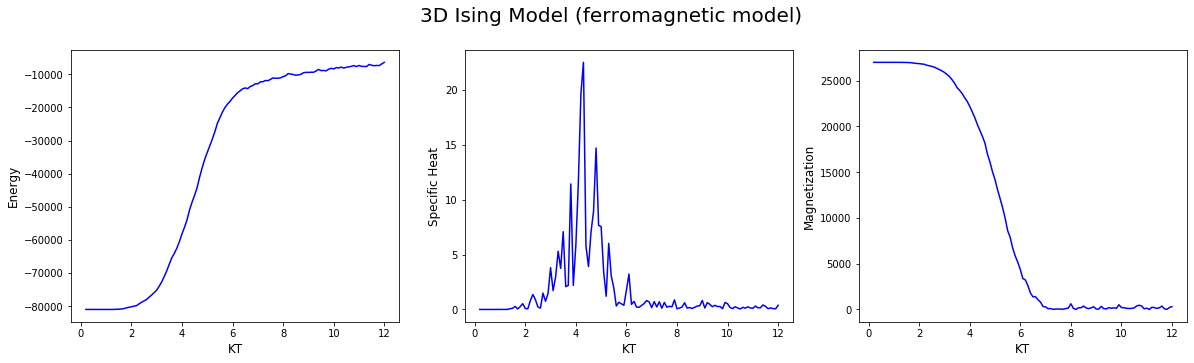

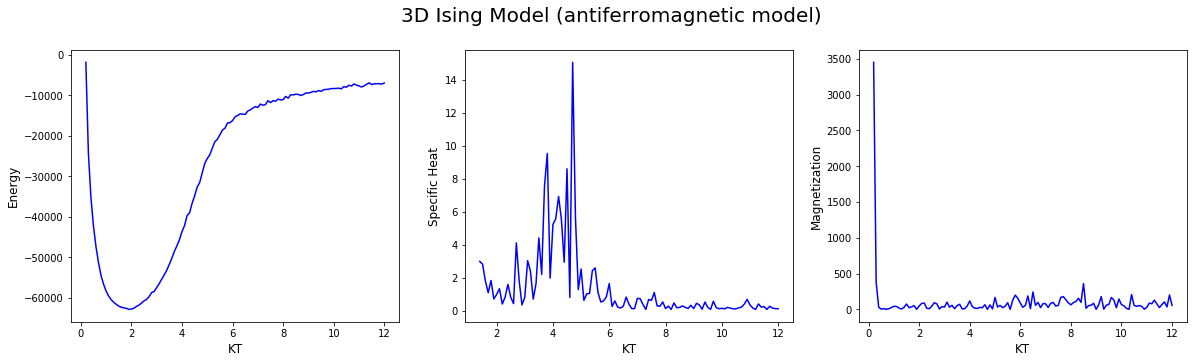

In [3]:
data3D = np.loadtxt("data/data3DFerro.dat")
Energies3D = data3D[:,0]
Magnetizations3D = data3D[:,1]
SpecificHeat3D = data3D[:,2]
X = np.arange(0.2,12.1,0.1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 5))
fig.suptitle('3D Ising Model (ferromagnetic model)',fontsize=20,y=1)

ax1.set_ylabel("Energy",fontsize=12)
ax1.set_xlabel("KT",fontsize=12)
ax1.plot(X,Energies3D,color="b")

ax2.set_ylabel("Specific Heat",fontsize=12)
ax2.set_xlabel("KT",fontsize=12)
ax2.plot(X,SpecificHeat3D,color="b")

ax3.set_ylabel("Magnetization",fontsize=12)
ax3.set_xlabel("KT",fontsize=12)
ax3.plot(X,np.abs(Magnetizations3D),color="b")
plt.show()

data3D = np.loadtxt("data/data3DAntiFerro.dat")
Energies3D = data3D[:,0]
Magnetizations3D = data3D[:,1]
SpecificHeat3D = data3D[:,2]
X = np.arange(0.2,12.1,0.1)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(20, 5))
fig.suptitle('3D Ising Model (antiferromagnetic model)',fontsize=20,y=1)

ax1.set_ylabel("Energy",fontsize=12)
ax1.set_xlabel("KT",fontsize=12)
ax1.plot(X,Energies3D,color="b")

ax2.set_ylabel("Specific Heat",fontsize=12)
ax2.set_xlabel("KT",fontsize=12)
ax2.plot(X[12:],SpecificHeat3D[12:],color="b")

ax3.set_ylabel("Magnetization",fontsize=12)
ax3.set_xlabel("KT",fontsize=12)
ax3.plot(X,np.abs(Magnetizations3D),color="b")
plt.show()

Para el caso 3D los resultados son similares a los del modelo 2D, pero se desplaza la temperatura de Curie hacía valores cercanos a $4/K_b$, además al existir más interacciones es posible observar que los cambios en la magnetización y en la energía se dan de manera más suave, ésto producto de la mayor inercia que traen las nuevas intracciones.

## Funcion de onda y solucion de integrales de camino

Una partícula sujeta a un potencial cuadrático según la mecánica clásica sigue una trayectoria completamente definida dada por $x(t)=A Sin{(\omega t+\phi)}$. Por otro lado, para la mecánica cuántica la trayectoria no está completamente determinada sino que la posición en el tiempo es una variable estocástica que está determinada por una función de densidad de probabilidad dada por $|\Psi(x,t)|^2$, donde $\Psi(x,t)$ es la función de onda. El problema que se plantea a continuación es encontrar $|\Psi(x)|^2$ para el oscilador armónico cuántico y para una partícula sujeta a un campo gravitacional que rebota en un piso, y para esto se hace uso de las integrales de camino de Feynmann.

### Integrales de camino

Las integrales de camino surgen como una idea de Feynmann para conectar la teoría cuántica con la teoría clásica. Él, siguiendo una sugerencia de Dirac, plantea que el principio de Hamilton es solo una aproximación en el limite $\hbar \rightarrow 0$ de un principio similar en la mecánica cuántica. A partir de esto, Feynmann postula que la función de onda para una partícula en el punto $(x_b,t_b)$ es de la forma:
$$\Psi(x_b,t_b)=\int dx_a G(x_b,t_b;x_a,t_a)\Psi(x_a,t_a)$$
En donde, $G(x_b,t_b;x_a,t_a)=\sqrt{\frac{m}{2\pi\mathrm{i}(t_b-t_a)}}\exp\left[\mathrm{i}\frac{m(x_b-x_a)^2}{2(t_b-t_a)}\right]$, es la función de Green o propagador.

La interpretación de Feynmann de esta ecuación es que $G(x_b,t_b;x_a,t_a)\Psi(x_a,t_a)$ representa un camino y la integral lo que hace es sumar sobre todos los posibles caminos que comienzan en A y terminan en B que puede seguir la partícula, tal como se observa en la siguiente figura:

![title](Imagenes/pathIntegral.png)

Donde todos los caminos son posibles, pero solo aquellos cercanos a la trayectoria clásica tienen una probabilidad de ocurrir sigificativa. Esta probabilidad está determinada por la función de Green, que a su vez es posible escribirla en términos de la acción clásica, la cual se define como: $$S[\bar{x}(t)]=\int_{t_a}^{t_b}dt L[x(t),\dot{x}(t)]$$

donde $L[x(t),\dot{x}(t)]= T[x,\dot{x}]-V[x]$

En partícular, para una partícula libre obtenemos que: $$S[\bar{x}(t)]=\frac{m}{2}(\dot{x})^2(t_b-t_a)=\frac{m(x_b-x_a)^2}{2(t_b-t_a)}$$

Lo que nos permite reescribir la función de Green en términos de la acción clásica de la forma:
$$G(x_b,t_b;x_a,t_a)=\sqrt{\frac{m}{2\pi\mathrm{i}(t_b-t_a)}}\exp\left(\frac{\mathrm{i}}{\hbar}S[b,a]\right)$$

Que permite obtener una conexión entre la mecánica cuántica y el principio de Hamilton que tanto buscaba Feynmann, de allí entonces Feynmann postula que $G$ debe ser calculada como la suma sobre todos los posibles caminos que puede seguir la partícula, de esta forma se obtiene que:
$$G(x_b,t_b;x_a,t_a)=\sum_{paths}\exp{\left(\frac{\mathrm{i}}{\hbar}S[b,a]\right)}$$

Podemos encontrar otra forma de escribir $G$ al hacer uso de la ecuación de Schrödinger independiente del tiempo ($\hat{H}\Psi_n=E_n\Psi_n$), y de que $\hat{H}$ es hermitico por lo que sus autofunciones ($\Psi$) forman una base completa en donde podemos expandir la solución:
$$\Psi(x,t)=\sum_{n=0}^{\infty}c_n\exp{(-\mathrm{i}E_nt)}\Psi_n(x)$$

Con $c_n=\int_{\infty}^{\infty}dx\Psi_n^*(x)\Psi(x,t=0)$ se obtiene de las condiciones de ortonormalidad de $\Psi_n$.

Reemplazando $c_n$ obtenemos:
$$\Psi(x,t)=\int_{\infty}^{\infty}dx_0\sum_{n=0}^{\infty}\Psi_n^*(x_0)\Psi_n(x)\exp{(-\mathrm{i}E_nt)}\Psi(x,t=0)$$

Lo que implica que:

$$G(x,t;x_0,t_0=0)=\sum_n\Psi_n^*(x_0)\Psi_n(x)\exp{(-\mathrm{i}E_nt)}$$

Y ademas, al ésta ser una función analitica es posible realizar una continuación hacia tiempos imaginarios, obteniendo así:

$$G(x,-\mathrm{i}\tau;x,t_0=0)=\sum_n|\Psi_n(x)|^2\exp{(-E_n\tau)}$$

De donde podemos extraer que: 

$$|\Psi(x)|^2=\lim_{\tau\to\infty}\exp{(E_0\tau)}G(x,-\mathrm{i}\tau;x,t_0=0)$$
donde el limite sirve para hacer el resto de términos de la suma aproximamdamente 0



### Integral de caminos discreta

Como la integral de caminos se realiza en el espacio-tiempo es necesario crear una rejilla con puntos discretos en el espacio-tiempo, por lo que se debe discretizar tanto el tiempo como el espacio. De esta forma, una trayectoria en el espacio-tiempo se ve como una unión de lineas rectas que conectan el punto A con el punto B, tal como se observa en la siguiente imagen: 

![title](Imagenes/pathIntegralDiscrete.png)

Para discretizar el tiempo, lo dividimos en $N$ intervalos de tamaño $\varepsilon$.

Mientras que para la discretización del espacio es más conveniente tratar la posición $x(t_j)$ como una variable continua, y luego de que haya sido calculada asociarla a un valor discreto $x_j$.

Usando el hecho de que $G(b,a)=\int dx_j G(x_a,t_b;x_j,t_j)G(x_j,t_j;x_a,t_a)$ podemos reescribir $G$ como :

$$G(b,a)=\int dx_1...dx_{n-1}\exp{(\mathrm{i}S[b,a])}$$

Que nos permite ver al propagador como la suma sobre todos los caminos que conectan A con B, en donde cada camino está pesado por $\exp{(iS[a,b])}$.

Al discretizar el espacio estamos haciendo que la integral para calcular S se convierta en una sumatoria, de tal forma que: $$S[b,a]=\sum_{j=1}^{n-1}S[x_{j+1},x_j]\simeq \sum_{j=1}^{n-1}L(x_j,\dot{x}_j)\varepsilon$$

Donde $L(x_j,\dot{x}_j)$ se refiere al promedio de L en la casilla j.

Al volver a usar tiempos imaginarios en lugar de tiempos reales obtenemos que:
$$L\left(x,\frac{dx}{-\mathrm{i}d\tau}\right)=-\mathcal{H}\left(x,\frac{dx}{d\tau}\right)$$

Que nos permite reescribir, usando que $\int\mathcal{H}(\tau)d\tau \simeq \sum_j\varepsilon E_j=\varepsilon\mathcal{E}$, a $$G(x,-\mathrm{i}\tau;x,0)=\int dx_1...dx_{n-1}\exp{[-\varepsilon\mathcal{E}]}$$

Lo que a su vez nos permite reescribir:

$$|\Psi_0(x)|^2=\frac{G(x,-\mathrm{i}\tau;x,0)}{\int dxG(x,-\mathrm{i}\tau;x,0)}=\frac{1}{Z}\lim_{\tau\to\infty}\int dx_1...dx_{n-1}\mathsf{e}^{-\varepsilon\mathcal{E}}$$

Y donde Z es la función de partición y $Z=\lim_{\tau\to\infty}\int dxdx_1...dx_{n-1}\mathsf{e}^{-\varepsilon\mathcal{E}}$

### Implementación

Todo esto anterior es la justificación teórica para desarrollar este problema de forma similar a como se desarrolló la solución para el modelo de Ising, la similitud entre los dos sistemas se da porque al pasar al espacio de tiempos imaginarios estamos convirtiendo la ecuación de Schrödinger dependiente del tiempo en la ecuación de difusión de calor.

Se hace bastante evidente la similitud al observar que el factor de peso en la suma es en ambos casos una exponencial negativa de una constante por la energía. Esto nos lleva a querer encontrar una relación entre la constante para el caso termodinámico (modelo de Ising) y la constante para el caso de la dinámica cuántica, veamos el factor de Boltzmann:
$$\mathsf{e}^{-\varepsilon\mathcal{E}}=\mathsf{e}^{-\mathcal{E}/(K_bT)}\rightarrow \varepsilon=\frac{1}{K_bT}$$

Para concretar, expresamos $G$ como integral de caminos la cual evaluamos como la suma de todas las trayectorias en la rejilla de espacio-tiempo que creamos. Cada posible camino ocurre con una probabilidad que viene dada por la acción, allí usamos el algoritmo de Metropolis papra incluir las fluctuaciones estadisticas correspondientes a la naturaleza cuántica del problema. El algoritmo varía en que ahora no se invertirá (o dejará de invertir) un espín según el cambio en la energía que dicho cambio produce sino que se cambiará un punto en la trayectoria de la partícula (se intercambia $x_j^{(k)}$ por un $x_j^{(k+1)}$, donde el super índice hace referencia al paso en el algoritmo) basado, de nuevo, en el cambio de energía que produce.

Si observamos de nuevo la imagen, lo que hacemos es cambiar el punto $x_j$ por el punto $x_j'$ y evaluar el $\Delta E$ que esto produce, y usar este $\Delta E$ en el algoritmo de Metropolis. Al realizar este procedimiento muchas veces (N veces) podemos aproximar el valor de $|\Psi(x_j)|^2\simeq \frac{\#x_j}{N}$, donde #$x_j$ es el numero de veces que aceptamos(o dejamos sin modificar) $x_j$ en el algoritmo de Metropolis.

## Resultados para el oscilador armónico cuántico
Parámetros utilizados:
<p style="font-size:10px">
$\varepsilon = 0.1$; $N_{time}=100$; $N{pos}=100$
</p>
Se realizó la prueba de fluctuación del algoritmo de Metropolis 100000 veces.

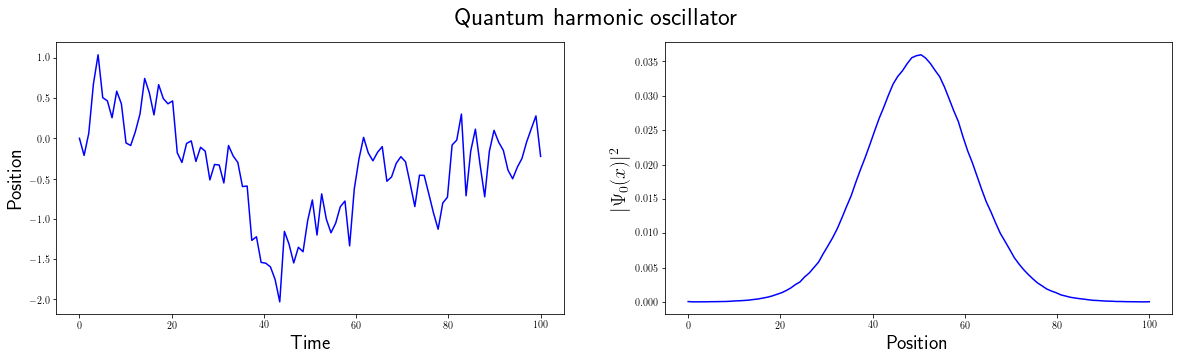

In [345]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))
path = np.loadtxt("data/pathOscilador.dat")
prob = np.loadtxt("data/probOscilador.dat")
prob = prob/np.sum(prob)
Xpath = np.linspace(0,len(path),len(path))
Xprob = np.linspace(0,len(prob),len(prob))
fig.suptitle('Quantum harmonic oscillator',fontsize=25)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel("Position",fontsize=20)
ax1.plot(Xpath,path,color="b")
ax2.set_xlabel("Position",fontsize=20)
ax2.set_ylabel(r"$|\Psi_0(x)|^2$",fontsize=20)
ax2.plot(Xprob,prob,color="b")
plt.show()

Al realizar la simulación usando métodos de Monte Carlo con los parámetros especificados anteriormente es posible replicar el comportamiento de $\Psi_0(x)$ con gran precisión en comparación con los resultados teóricos que predicen un comportamiento gaussiano para esta función. 

Además, en la figura de la izquierda se puede oobservar una posible trayectoria seguida por la partícula cuántica en el espacio-tiempo. Esta trayectoria es producto de fluctuaciones cuánticas alrededor de la trayectoria de un oscilador armónico clásico.

## Resultados para una partícula cuántica que rebota bajo efecto gravitacional
Parámetros utilizados:
<p style="font-size:10px">
$\varepsilon = 0.05$; $N_{time}=100$; $N{pos}=100$; $g=2$

Se realizó la prueba de fluctuación del algoritmo de Metropolis 1000000 veces.

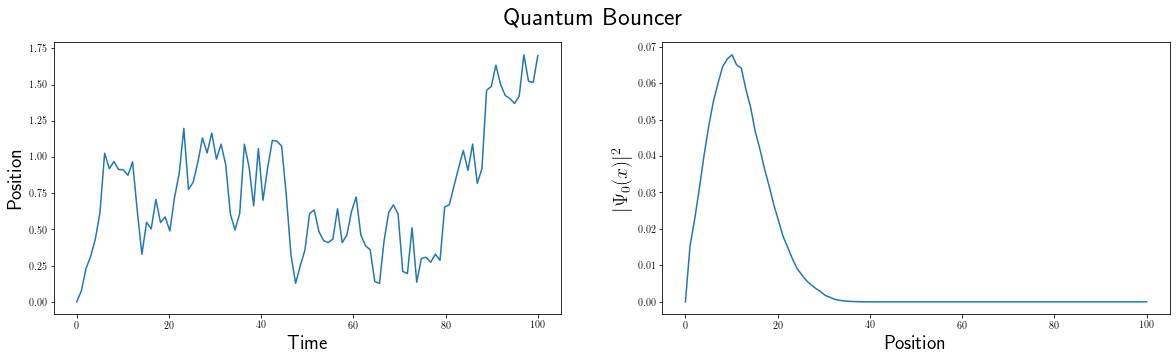

In [346]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))
path = np.loadtxt("data/pathBouncer.dat")
prob = np.loadtxt("data/probBouncer.dat")
prob = prob/np.sum(prob)
Xpath = np.linspace(0,len(path),len(path))
Xprob = np.linspace(0,len(prob),len(prob))
fig.suptitle('Quantum Bouncer',fontsize=25)
ax1.set_xlabel("Time",fontsize=20)
ax1.set_ylabel("Position",fontsize=20)
ax1.plot(Xpath,path)
ax2.set_xlabel("Position",fontsize=20)
ax2.set_ylabel(r"$|\Psi_0(x)|^2$",fontsize=20)
ax2.plot(Xprob,prob)
plt.show()

En este caso tenemos una partícula que está, inicialmente ubicada en un piso bajo acción de la gravedad, las fluctuaciones cuánticas producen que la partícula eventualmente se desprenda del piso, pero de nuevo la gravedad hace que ésta vuelva a bajar. Ésto es posible observarlo en las dos gráficas anteriores, en la de la función de onda, es posible observar que la probabilidad de que la partícula se encuentre en posiciones cerca al suelo es grande y se hace 0 a medida que la partícula se aleja del suelo, ésto producto del potencial gravitacional al que está sometida. Por otro lado, en la gráfica de la trayectoria (izquierda) se observa que la partícula se separa espontáneamente del piso, y eventualmente vuelve y se vuelve a alejar, tal como lo hace una partícula clásica que rebota, pero ésta lo hace con las fluctuaciones propias de su naturaleza cuántica. 